<a href="https://colab.research.google.com/github/SammyBoy-09/Tree-Species-Classification-Week2/blob/main/Tree_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tree Species Classification

### Description:
######This project is done in view of the 4-weeks Shell-Edunet Skills4Future in
### Week 2
Internship by ~
#Samuel Lazar

In [1]:
# ---------------------------------------------
# 📥 STEP 1: Download and Extract Dataset Folder
# ---------------------------------------------

# Download the entire GitHub repository as a ZIP file (quiet mode)
!wget -q https://github.com/kailas93/Tree_species/archive/refs/heads/master.zip

# Unzip the downloaded ZIP file quietly
!unzip -q master.zip

# Move only the dataset folder (Tree_Species_Dataset) to /content
# This ensures we have the folder with a clean name at a known path
!mv Tree_species-master/Tree_Species_Dataset /content/Tree_Species_Dataset

# Remove the extracted repository and the zip file to clean up space
!rm -rf Tree_species-master master.zip


https://github.com/kailas93/Tree_species/tree/master/Tree_Species_Dataset

In [2]:
# ---------------------------------------------------
# 📂 STEP 2: Verify the Downloaded Dataset Structure
# ---------------------------------------------------

import os

# Path to the extracted dataset folder
repo_path = "/content/Tree_Species_Dataset"  # Make sure this matches your actual folder name

# List and display all items (e.g., subfolders for each class) in the dataset directory
print("📁 Contents of the dataset folder:")
print(os.listdir(repo_path))


📁 Contents of the dataset folder:
['gunda', 'mango', 'garmalo', 'bili', 'cactus', 'coconut', 'banyan', 'simlo', 'motichanoti', 'sitafal', 'pipal', 'jamun', 'saptaparni', 'kanchan', 'khajur', 'gulmohor', 'vad', 'pilikaren', 'bamboo', 'kesudo', 'sonmahor', 'nilgiri', 'neem', 'other', 'babul', 'sugarcane', 'amla', 'champa', 'shirish', 'asopalav']


In [3]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 30


In [3]:
# -------------------------------------------------------
# 📊 STEP 3: Get the Number of Classes in the Dataset
# -------------------------------------------------------

# Get the list of all class subdirectories (one per tree species)
class_dirs = os.listdir(repo_path)

# Print the number of unique classes
print(f"🌳 Number of tree species (classes): {len(class_dirs)}")

🌳 Number of tree species (classes): 30


In [4]:
# ---------------------------------------------------------------------
# 🖼️ STEP 4: Collect Image Paths and Their Corresponding Class Labels
# ---------------------------------------------------------------------

import glob

image_paths = []  # List to store full image file paths
labels = []       # List to store the corresponding class labels

# Loop through each class folder in the dataset
for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)

    # Check to ensure it's a directory (skip files like .DS_Store, etc.)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, img_file)
            image_paths.append(image_path)     # Save full image path
            labels.append(class_name)          # Save class name (label)

# Print total number of images found
print(f"📸 Total images found: {len(image_paths)}")


📸 Total images found: 1600


In [6]:
# -------------------------------------------------------------------
# 📊 STEP 5: Analyze Image Distribution Across Tree Species (Classes)
# -------------------------------------------------------------------

import pandas as pd

# Create a dictionary mapping each class to its number of images
class_counts = {
    cls: len(os.listdir(os.path.join(repo_path, cls)))
    for cls in class_dirs
}

# Convert the dictionary into a DataFrame for better visualization and analysis
class_counts_df = pd.DataFrame.from_dict(
    class_counts, orient='index', columns=['Image Count']
)

# Display the top classes by number of images
print("📈 Top classes by image count:")
print(class_counts_df.sort_values('Image Count', ascending=False).head())

# Display the shape of the DataFrame (number of classes, columns)
print(f"\n📐 class_counts_df shape: {class_counts_df.shape}")


📈 Top classes by image count:
         Image Count
other            150
gunda             50
garmalo           50
bili              50
cactus            50

📐 class_counts_df shape: (30, 1)


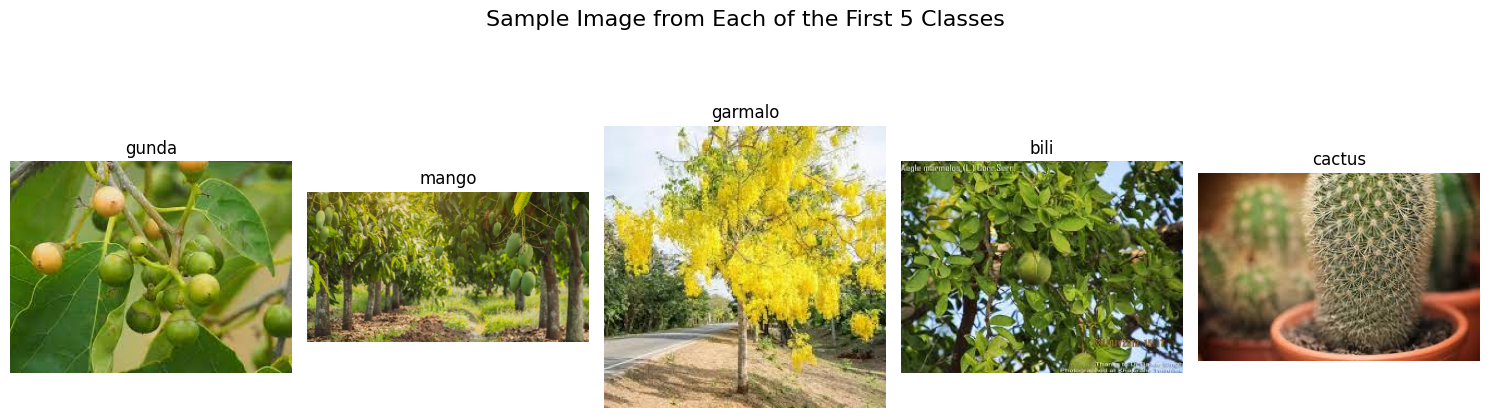

In [7]:
# ----------------------------------------------------------------
# 🖼️ STEP 6: Display One Sample Image from Each of the First N Classes
# ----------------------------------------------------------------

import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    """
    Displays one sample image from each of the first N classes.

    Parameters:
        repo_path (str): Path to the root dataset directory
        class_dirs (list): List of class (species) folder names
        n (int): Number of classes to display (default is 5)
    """
    plt.figure(figsize=(15, 5))

    for i, class_dir in enumerate(class_dirs[:n]):
        class_path = os.path.join(repo_path, class_dir)
        first_image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Pick the first image

        # Load and display the image
        img = Image.open(first_image_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')

    plt.suptitle("Sample Image from Each of the First {} Classes".format(n), fontsize=16)
    plt.tight_layout()
    plt.show()

# 🔍 Show sample images
show_sample_images(repo_path, class_dirs)


In [8]:
# ---------------------------------------------------------------------
# 📏 STEP 7: Analyze Image Dimensions Across the Dataset
# ---------------------------------------------------------------------

from PIL import Image
import pandas as pd

image_shapes = []  # List to store (width, height) tuples

# Loop through each image and collect its dimensions
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)  # (width, height)
        except Exception as e:
            print(f"⚠️ Skipping {img_file}: {e}")

# Create a DataFrame to summarize image sizes
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])

# Display the first few entries
print("🧾 Sample image dimensions:")
shapes_df.head()


🧾 Sample image dimensions:


,Width,Height
0,259,194
1,194,260
2,260,194
3,225,225
4,300,168


In [9]:
# ----------------------------------------------------------------------
# 📊 STEP 8: Statistical Summary of Image Dimensions (Width & Height)
# ----------------------------------------------------------------------

# Display basic statistics: count, mean, std, min, max, etc.
summary_stats = shapes_df.describe()

print("📐 Image Dimension Summary:")
print(summary_stats)


📐 Image Dimension Summary:
             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [10]:
# ---------------------------------------------------------------------
# 🧪 STEP 9: Detect Duplicate Images Using MD5 Hashing
# ---------------------------------------------------------------------

import hashlib
from collections import defaultdict

# Dictionary to group image paths by their hash value
hashes = defaultdict(list)

# Loop through all images and compute their hash
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Read the image in binary mode and compute its MD5 hash
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)  # Group by hash

# Filter out the hash entries that have more than one file (i.e., duplicates)
duplicates = {hash_val: files for hash_val, files in hashes.items() if len(files) > 1}

# Report the number of duplicate sets found
print(f"🧯 Duplicate image sets found: {len(duplicates)}")


🧯 Duplicate image sets found: 82


In [11]:
# -----------------------------------------------------------------------
# 🧹 STEP 10: Detect Corrupted Images (Unreadable or Broken Files)
# -----------------------------------------------------------------------

from PIL import Image

corrupt_images = []  # List to store paths of corrupted images

# Loop through all image files and check if they can be opened properly
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        try:
            img = Image.open(img_path)
            img.verify()  # Verify image integrity without fully loading it
        except Exception as e:
            corrupt_images.append(img_path)  # Add to list if verification fails

# Report total number of corrupted images found
print(f"🚫 Corrupted images detected: {len(corrupt_images)}")


🚫 Corrupted images detected: 0



🔁 Duplicate Set 1 (Total 2 images):


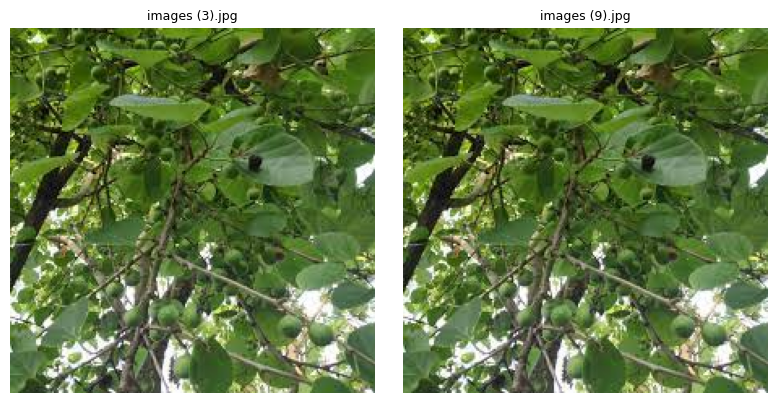


🔁 Duplicate Set 2 (Total 2 images):


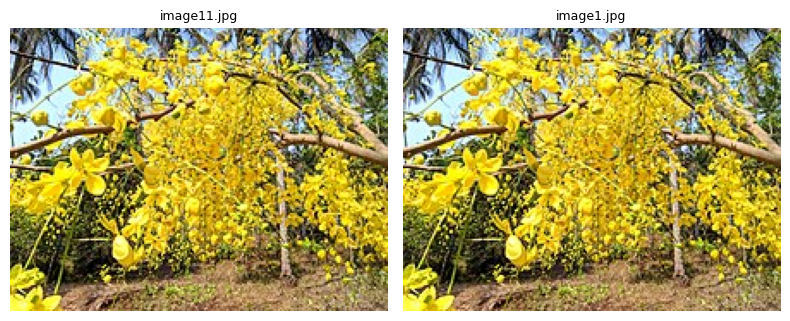


🔁 Duplicate Set 3 (Total 2 images):


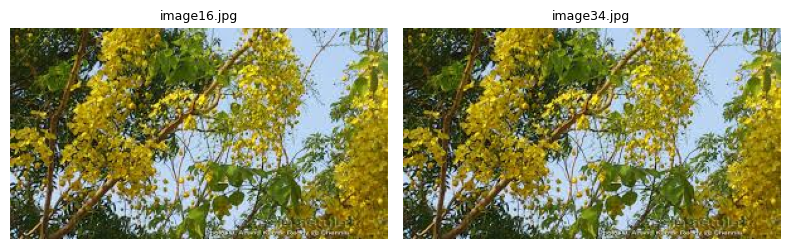

In [12]:
# ---------------------------------------------------------------------
# 🧭 STEP 11: Visualize Detected Duplicate Image Sets
# ---------------------------------------------------------------------

import matplotlib.pyplot as plt
from PIL import Image
import os

def show_duplicate_sets(duplicates, sets_to_display=3):
    """
    Display visual examples of detected duplicate image sets.

    Parameters:
        duplicates (dict): Dictionary where keys are hash values and values are lists of duplicate image paths.
        sets_to_display (int): Number of duplicate sets to visualize.
    """
    shown = 0

    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break

        print(f"\n🔁 Duplicate Set {shown + 1} (Total {len(dup_paths)} images):")
        plt.figure(figsize=(4 * len(dup_paths), 4))  # scale width by number of duplicates

        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i + 1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path), fontsize=9)
                plt.axis('off')
            except Exception as e:
                print(f"⚠️ Could not display image: {img_path} — {e}")
                continue

        plt.tight_layout()
        plt.show()
        shown += 1

# 🔍 Show visual confirmation of duplicate image sets
show_duplicate_sets(duplicates, sets_to_display=3)


In [13]:
# ---------------------------------------------------------------------
# 🗑️ STEP 12: Remove Duplicate Images (Keep Only One Copy)
# ---------------------------------------------------------------------

import os

removed_count = 0  # Counter for successfully removed images

# Loop through each list of duplicate image paths
for dup_list in duplicates.values():
    # Keep the first image, remove all others
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)  # Delete the file
            removed_count += 1
        except Exception as e:
            print(f"❌ Error deleting {img_path}: {e}")

# Report total number of duplicates removed
print(f"✅ Successfully removed {removed_count} duplicate images.")


✅ Successfully removed 86 duplicate images.


In [14]:
# ---------------------------------------------------------------------
# 🔁 STEP 13: Re-check for Remaining Duplicates After Cleanup
# ---------------------------------------------------------------------

import hashlib
from collections import defaultdict

# Reset the hash map for image content
hashes = defaultdict(list)

# Recompute hashes to check for any remaining duplicate files
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Find hash entries with more than one file => still duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}

# Print result
print(f"🔁 Duplicates remaining after cleanup: {len(duplicates)}")


🔁 Duplicates remaining after cleanup: 0


In [15]:
# ------------------------------------------------------------------------
# 📏 STEP 14: Detect Very Small or Very Large Images in the Dataset
# ------------------------------------------------------------------------

from PIL import Image
import pandas as pd

image_info = []  # Store metadata: path, width, height, class

# Collect width and height of each image
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except Exception as e:
            print(f"⚠️ Skipped corrupted or unreadable image: {img_path}")
            continue

# Convert to DataFrame for filtering and analysis
df_sizes = pd.DataFrame(image_info)

# Define size thresholds (you can tweak these based on your model input expectations)
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

# Summary
print(f"🔻 Very small images (<150px in any dimension): {len(small_imgs)}")
print(f"🔺 Very large images (>1000px wide or >2000px tall): {len(large_imgs)}")


🔻 Very small images (<150px in any dimension): 20
🔺 Very large images (>1000px wide or >2000px tall): 40


/tmp/ipython-input-16-2783551894.py:30: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


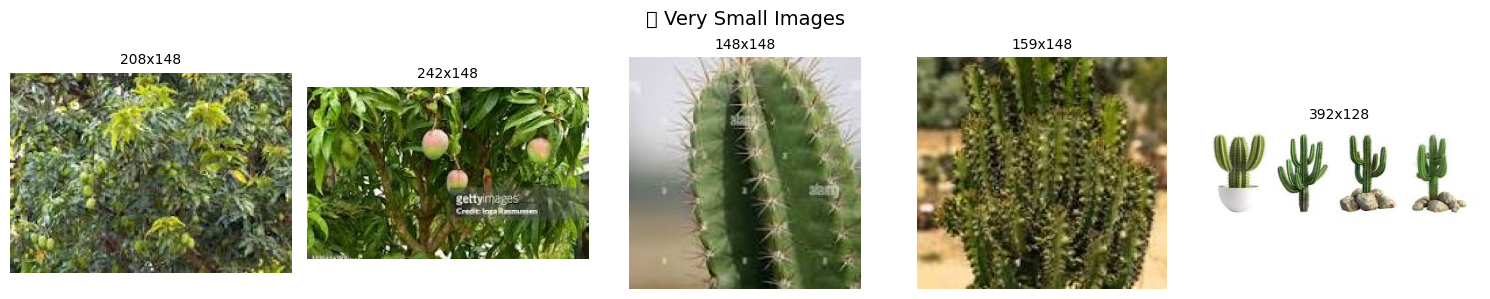

/tmp/ipython-input-16-2783551894.py:30: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


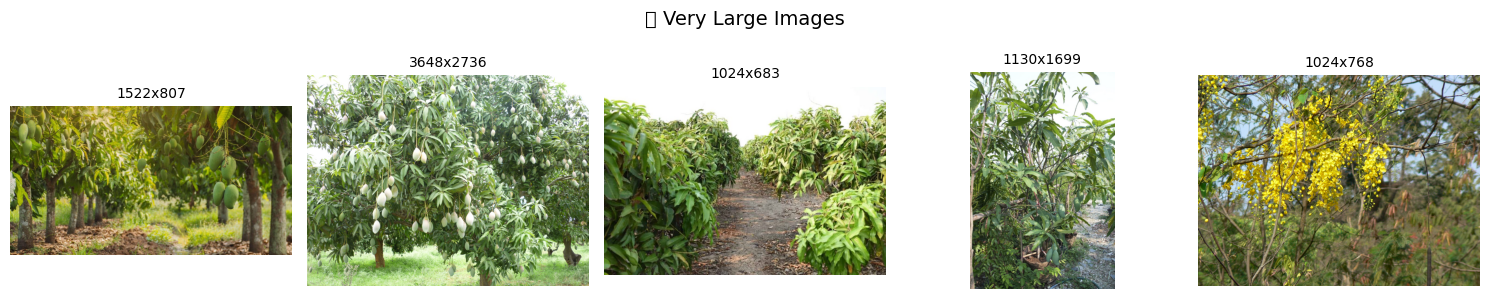

In [16]:
# --------------------------------------------------------------------------
# 🖼️ STEP 15: Visualize Very Small and Very Large Images for Inspection
# --------------------------------------------------------------------------

import matplotlib.pyplot as plt
from PIL import Image

def show_images(df_subset, title, n=5):
    """
    Display a subset of images along with their dimensions.

    Parameters:
        df_subset (DataFrame): Subset of df_sizes containing image metadata.
        title (str): Title for the image group (e.g., "Very Small Images").
        n (int): Number of images to display.
    """
    plt.figure(figsize=(15, 3))

    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        try:
            img = Image.open(row['path'])
            plt.subplot(1, n, i + 1)
            plt.imshow(img)
            plt.title(f"{row['width']}x{row['height']}", fontsize=10)
            plt.axis('off')
        except Exception as e:
            print(f"⚠️ Error loading image {row['path']}: {e}")

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# 🔍 Display examples of problematic image sizes
show_images(small_imgs, "🔻 Very Small Images")
show_images(large_imgs, "🔺 Very Large Images")



In [17]:
# --------------------------------------------------------------------------
# 🗑️ STEP 16: Remove Outlier Images That Are Too Small or Too Large
# --------------------------------------------------------------------------

import os

# Combine both small and large image records into one DataFrame
outliers = pd.concat([small_imgs, large_imgs], ignore_index=True)

removed_count = 0  # Counter to track successful deletions

# Iterate over all outlier image paths and attempt to delete them
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"❌ Failed to remove {path}: {e}")

# Final summary
print(f"🗑️ Successfully removed {removed_count} outlier images (very small + very large).")


🗑️ Successfully removed 60 outlier images (very small + very large).


In [18]:
# ------------------------------------------------------------------------
# 📏 STEP 17: Recalculate Image Sizes After Removing Outliers
# ------------------------------------------------------------------------

from PIL import Image
import pandas as pd

image_info = []  # Reset list to store updated image metadata

# Re-scan all class folders to gather current image dimensions
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except Exception as e:
            print(f"⚠️ Skipped unreadable image: {img_path}")

# Create DataFrame from updated image information
df_sizes = pd.DataFrame(image_info)

# Show statistical summary of image dimensions
print("📐 Updated Image Dimension Summary (After Cleanup):")
print(df_sizes[['width', 'height']].describe())


📐 Updated Image Dimension Summary (After Cleanup):
             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [19]:
%pip install tensorflow

In [20]:
# --------------------------------------------------------------------------------
# 🧪 STEP 18: Set Up Image Augmentation and Data Generators (Train + Validation)
# --------------------------------------------------------------------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define standard image input size and batch size for the model
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# ImageDataGenerator for training and validation (with augmentation)
datagen = ImageDataGenerator(
    rescale=1.0 / 255,         # Normalize pixel values to [0, 1]
    validation_split=0.2,      # 20% of data for validation
    rotation_range=20,         # Random rotation (±20 degrees)
    zoom_range=0.2,            # Random zoom up to 20%
    shear_range=0.2,           # Random shearing
    horizontal_flip=True       # Random horizontal flipping
)

# 👟 Training generator (80% of data)
train_gen = datagen.flow_from_directory(
    directory=repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',      # For multi-class classification
    subset='training',             # Use subset for training
    shuffle=True                   # Shuffle the dataset
)

# 🧪 Validation generator (20% of data)
val_gen = datagen.flow_from_directory(
    directory=repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)



Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [21]:
# ---------------------------------------------------------------------------------------
# 🤖 STEP 19: Build a CNN Model Using Transfer Learning with EfficientNetB0 (Frozen Base)
# ---------------------------------------------------------------------------------------

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load EfficientNetB0 without the top classification head
# Use pre-trained weights from ImageNet for feature extraction
base_model = EfficientNetB0(
    include_top=False,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    weights='imagenet'
)

# Freeze base model layers to prevent training during initial training phase
base_model.trainable = False

# Build a Sequential model on top of the base
model = Sequential([
    base_model,                          # Pre-trained feature extractor
    GlobalAveragePooling2D(),            # Convert feature maps to 1D vector
    Dropout(0.3),                        # Dropout for regularization
    Dense(128, activation='relu'),       # Fully connected layer
    Dropout(0.3),                        # Additional regularization
    Dense(train_gen.num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model with Adam optimizer and categorical crossentropy for multi-class
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture summary
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [22]:
# --------------------------------------------------------
# 🏋️ STEP 20: Train the Model on Tree Species Dataset
# --------------------------------------------------------

EPOCHS = 10  # You can increase this for better performance

# Train the model using the training and validation generators
history = model.fit(
    train_gen,                  # Training data
    validation_data=val_gen,   # Validation data
    epochs=EPOCHS,              # Number of training epochs
    verbose=1                   # Show progress bar
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.0657 - loss: 3.4494 - val_accuracy: 0.0903 - val_loss: 3.3950
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 441ms/step - accuracy: 0.0598 - loss: 3.4061 - val_accuracy: 0.0903 - val_loss: 3.3782
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 460ms/step - accuracy: 0.0772 - loss: 3.3980 - val_accuracy: 0.0903 - val_loss: 3.3777
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.0849 - loss: 3.3817 - val_accuracy: 0.0903 - val_loss: 3.3790
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 498ms/step - accuracy: 0.0863 - loss: 3.3993 - val_accuracy: 0.0903 - val_loss: 3.3766
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 463ms/step - accuracy: 0.0963 - loss: 3.3809 - val_accuracy: 0.0903 - val_loss: 3.3814
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 469ms/step - accuracy: 0.0870 - loss: 3.3938 - val_accuracy: 0.0903 - val_loss: 3.3783
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 645ms/step - accuracy: 0.0837 - loss: 3.3820 - val_accurac

/tmp/ipython-input-23-3713925854.py:16: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-23-3713925854.py:16: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


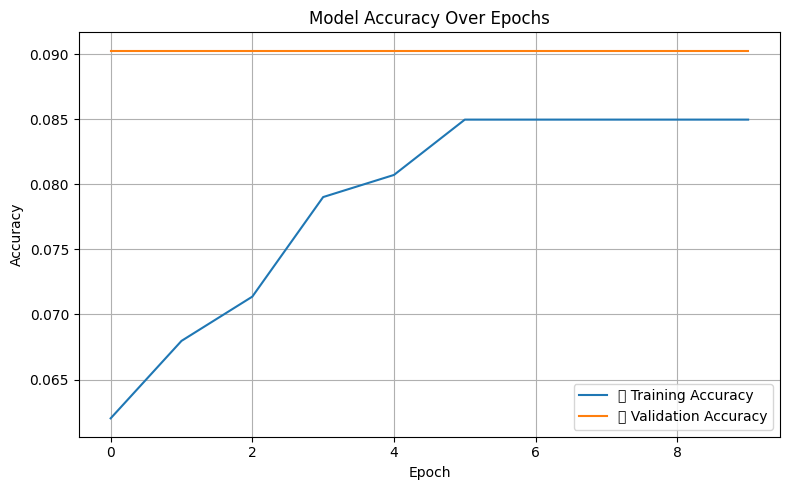

✅ Model saved as 'tree_species_model.h5'


In [23]:
# -----------------------------------------------------------------
# 📈 STEP 21: Plot Training vs Validation Accuracy Over Epochs
# -----------------------------------------------------------------

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='🟩 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='🟦 Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# 💾 STEP 22: Save the Trained Model to a File
# -----------------------------------------------------------------

# Save model in HDF5 format
model.save("tree_species_model.h5")
print("✅ Model saved as 'tree_species_model.h5'")


In [24]:
# -----------------------------------------------------------------------------------
# 🌳 ALTERNATIVE MODEL: Train a Custom Convolutional Neural Network (CNN) from Scratch
# -----------------------------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ----------------------------------------
# 🔧 Define image and training parameters
# ----------------------------------------
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10

# ----------------------------------------
# 🧪 Data augmentation and normalization
# ----------------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    validation_split=0.2,     # Split 80% train, 20% validation
    rotation_range=20,        # Random rotations
    zoom_range=0.2,           # Random zooms
    horizontal_flip=True      # Random horizontal flips
)

# ----------------------------------------
# 📦 Training and validation generators
# ----------------------------------------
train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# ----------------------------------------
# 🧠 Build a simple CNN model
# ----------------------------------------
num_classes = train_generator.num_classes

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# ----------------------------------------
# ⚙️ Compile the CNN model
# ----------------------------------------
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ----------------------------------------
# 🏋️ Train the model
# ----------------------------------------
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# ----------------------------------------
# 💾 Save the trained CNN model
# ----------------------------------------
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 670ms/step - accuracy: 0.0666 - loss: 3.7444 - val_accuracy: 0.1083 - val_loss: 3.2322
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 514ms/step - accuracy: 0.1234 - loss: 3.2161 - val_accuracy: 0.1480 - val_loss: 2.9968
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 439ms/step - accuracy: 0.1468 - loss: 3.0425 - val_accuracy: 0.1805 - val_loss: 2.8871
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 469ms/step - accuracy: 0.1636 - loss: 2.9575 - val_accuracy: 0.2022 - val_loss: 2.8220
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.1808 - loss: 2.8517 - val_accuracy: 0.2491 - val_loss: 2.7019
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.2122 - loss: 2.7873 - val_accuracy: 0.2455 - val_loss: 2.6261
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 440ms/step - accuracy: 0.2282 - loss: 2.7004 - val_accuracy: 0.2238 - val_loss: 2.7887
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 439ms/step - accuracy: 0.2473 - loss: 2.7050 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


/tmp/ipython-input-25-3641922211.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-3641922211.py:15: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-3641922211.py:15: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


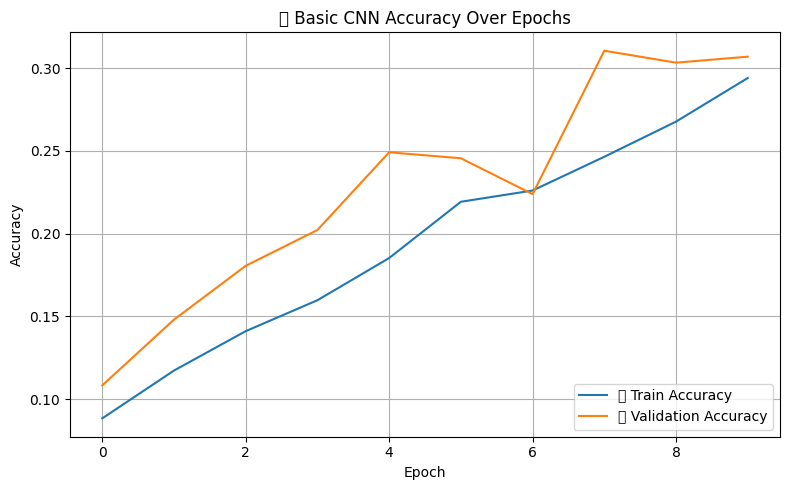

In [25]:
# -----------------------------------------------------------------
# 📈 STEP 23: Plot Training and Validation Accuracy for Basic CNN
# -----------------------------------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Optional: make the plot a bit larger
plt.plot(history_cnn.history['accuracy'], label='🟩 Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='🟦 Validation Accuracy')
plt.title("📊 Basic CNN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# --------------------------------------------------------------------------------------
# 🧠 ALTERNATIVE CNN (Improved): Add BatchNormalization for More Stable & Faster Training
# --------------------------------------------------------------------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# --------------------------------------------------
# 🏗️ Model Architecture with BatchNormalization
# --------------------------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # Adjust based on your actual number of classes
])

# --------------------------------------------------
# ⚙️ Compile the model
# --------------------------------------------------
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Smaller LR helps with deeper networks
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --------------------------------------------------
# 🏋️ Train the model
# --------------------------------------------------
history_improved_cnn = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    verbose=1
)

# --------------------------------------------------
# 💾 Save the trained model
# --------------------------------------------------
model.save("improved_cnn_model.h5")
print("✅ Improved CNN model saved as 'improved_cnn_model.h5'")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 544ms/step - accuracy: 0.0626 - loss: 5.1964 - val_accuracy: 0.0325 - val_loss: 6.6288
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 467ms/step - accuracy: 0.0930 - loss: 3.2739 - val_accuracy: 0.0325 - val_loss: 8.6754
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 448ms/step - accuracy: 0.1176 - loss: 3.1996 - val_accuracy: 0.0433 - val_loss: 11.2270
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 443ms/step - accuracy: 0.1536 - loss: 3.0909 - val_accuracy: 0.0361 - val_loss: 14.0743
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 469ms/step - accuracy: 0.1536 - loss: 3.0469 - val_accuracy: 0.0903 - val_loss: 18.2131
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 445ms/step - accuracy: 0.1393 - loss: 3.0836 - val_accuracy: 0.0903 - val_loss: 25.9083
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 445ms/step - accuracy: 0.1396 - loss: 3.0497 - val_accuracy: 0.1227 - val_loss: 20.9593
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 473ms/step - accuracy: 0.1821 - loss: 2.9377 - val

✅ Improved CNN model saved as 'improved_cnn_model.h5'
